In [1]:
# download example data
from downloaddata import download_example_data
download_example_data()

## WholeSlideDataSet

In [2]:
from wholeslidedata.dataset import WholeSlideDataSet
from wholeslidedata.source.utils import whole_slide_files_from_folder_factory
from wholeslidedata.source.associations import associate_files
from matplotlib import pyplot as plt
from wholeslidedata.annotation import utils as annotation_utils

### Get images and annotations files from folder

In [3]:
folder = '/tmp/'

image_files = whole_slide_files_from_folder_factory(folder, 'wsi', excludes=('mask',), image_backend='openslide')
annotation_files = whole_slide_files_from_folder_factory(folder, 'wsa', excludes=('tif',), annotation_parser='asap')

print(f'image files found in {folder}')
print(image_files)
print()
print(f'annotation files found in {folder}')
print(annotation_files)

print('\nimage and annotation path:')
print('image_file', image_files[0].path)
print('annotation_file', annotation_files[0].path)

image files found in /tmp/

annotation files found in /tmp/

image and annotation path:
image_file /tmp/TCGA-21-5784-01Z-00-DX1.tif
annotation_file /tmp/TCGA-21-5784-01Z-00-DX1.xml


### Associate images and annotations

In [4]:
associations = associate_files(image_files, annotation_files)
for file_key, files in associations.items():
    print('file key: ', file_key)
    print()
    for file_type, file_type_files in files.items():
        print(file_type)
        print(file_type_files)
        print()

file key:  TCGA-21-5784-01Z-00-DX1

<class 'wholeslidedata.source.files.WholeSlideImageFile'>

<class 'wholeslidedata.source.files.WholeSlideAnnotationFile'>



Above we can see that the image file and annotation file are associated with the same file key. With an association dictionary we can build a wholeslidedataset as follows:

### Create a dataset

In [5]:
dataset = WholeSlideDataSet(mode='default', associations=associations, labels=['lymphocytes', 'stroma', 'tumor'], copy_path='/tmp/data')

Copied from '/tmp/TCGA-21-5784-01Z-00-DX1.tif'
Copied to: '/tmp/data/images/TCGA-21-5784-01Z-00-DX1.tif'
...
Copied from '/tmp/TCGA-21-5784-01Z-00-DX1.xml'
Copied to: '/tmp/data/annotations/TCGA-21-5784-01Z-00-DX1.xml'
...


In [6]:
# print some statistics
print(dataset.annotations_per_label_per_key)

{'TCGA-21-5784-01Z-00-DX1': {'tumor': 5, 'lymphocytes': 3, 'stroma': 2}}


In [7]:
print(dataset.sample_references.keys())
print()
lymphocytes_references = dataset.sample_references['lymphocytes']
print('lymphcytes annotation references')
for lymphocyte_reference in lymphocytes_references:
    print(lymphocyte_reference)


dict_keys(['lymphocytes', 'stroma', 'tumor'])

lymphcytes annotation references
WholeSlideSampleReference(file_index=0, file_key='TCGA-21-5784-01Z-00-DX1', wsa_index=0, annotation_index=0)
WholeSlideSampleReference(file_index=0, file_key='TCGA-21-5784-01Z-00-DX1', wsa_index=0, annotation_index=1)
WholeSlideSampleReference(file_index=0, file_key='TCGA-21-5784-01Z-00-DX1', wsa_index=0, annotation_index=2)


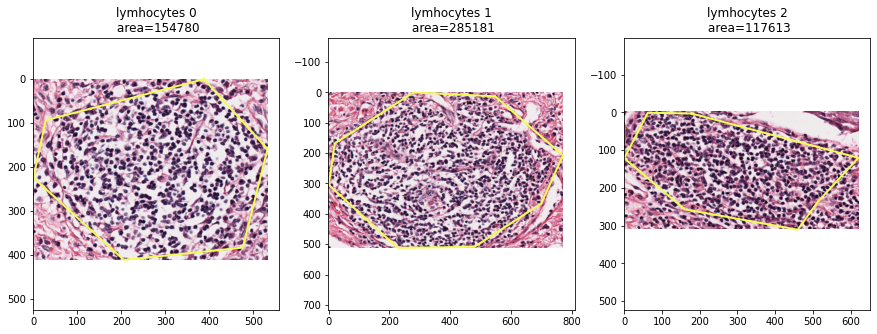

In [9]:
fig, ax = plt.subplots(1,len(lymphocytes_references), figsize=(15,5))
for idx, lymphocyte_reference in enumerate(lymphocytes_references):
    # get the associated image
    image = dataset.get_wsi_from_reference(lymphocyte_reference)
    # get the polygon from the associated annotations
    wsa = dataset.get_wsa_from_reference(lymphocyte_reference)
    lymphocytes_annotation = wsa.annotations[lymphocyte_reference.annotation_index]
    
    patch = image.get_annotation(lymphocytes_annotation, 0.5)
    ax[idx].imshow(patch)
    title = f'lymhocytes {idx}\n area={int(lymphocytes_annotation.area)}'
    annotation_utils.plot_annotations([lymphocytes_annotation], title=title, ax=ax[idx], use_base_coordinates=True)
plt.show()